# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [320]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")


# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [321]:
# Checking the number of mice.
number_mice = combined_data["Mouse ID"].nunique()
number_mice

249

In [322]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Extract the unique Mouse IDs of the duplicate entries
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()

# Convert to the specific format
output_array = [duplicate_mouse_ids]

output_array


[array(['g989'], dtype=object)]

In [323]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Get all data for the duplicate Mouse IDs
duplicate_mouse_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mice['Mouse ID'])]

# Display all data for the duplicate Mouse IDs

duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [324]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Create a clean DataFrame by dropping rows with duplicate Mouse IDs
clean_data = combined_data[~combined_data['Mouse ID'].isin(duplicate_mice['Mouse ID'])]


clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [325]:
# Checking the number of mice in the clean DataFrame.

num_mice_clean = clean_data['Mouse ID'].nunique()
num_mice_clean


248

## Summary Statistics

In [326]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).mean()
median = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).median()
var = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).var()
std = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).std()
sem = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).sem()

summary_df = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})

summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [327]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_aggregation =  clean_data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_aggregation

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

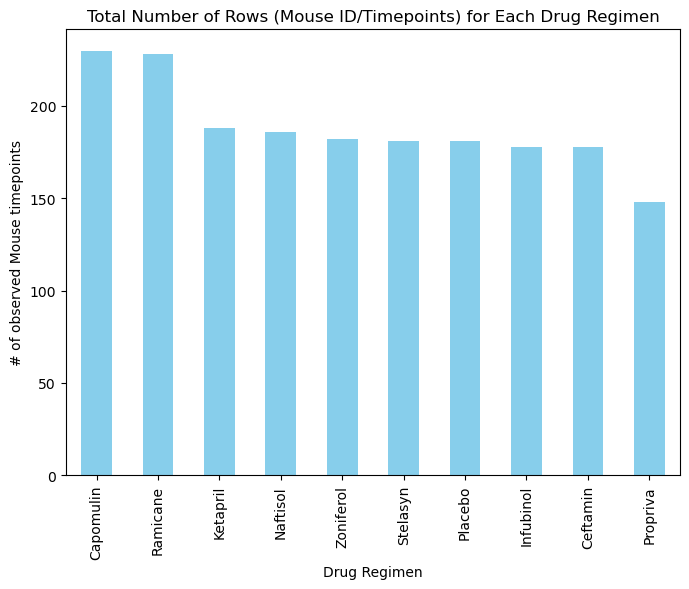

In [328]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts = clean_data['Drug Regimen'].value_counts()
drug_counts.plot(kind='bar', color='skyblue', figsize=(7, 6))
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of observed Mouse timepoints')


plt.tight_layout()
plt.show()

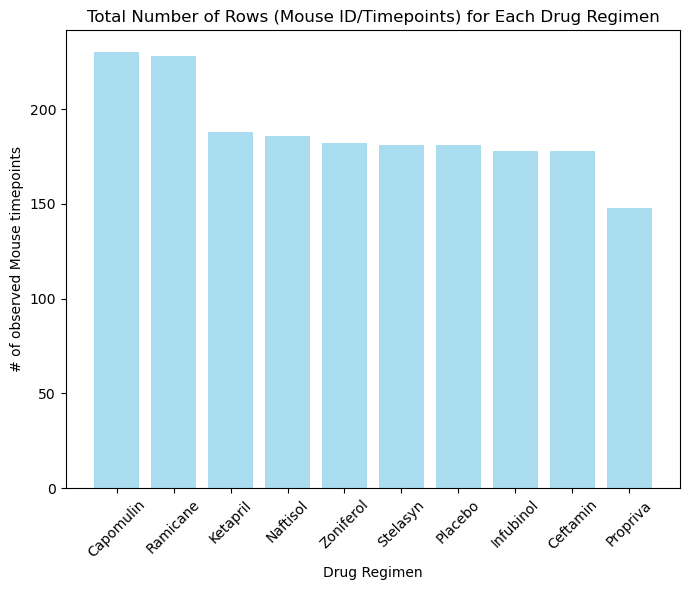

In [329]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

drug_counts = clean_data['Drug Regimen'].value_counts()

regimens = drug_counts.index
counts = drug_counts.values


plt.figure(figsize=(7, 6))
plt.bar(regimens, counts, color='skyblue', alpha=0.7, align='center')

plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of observed Mouse timepoints')


plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

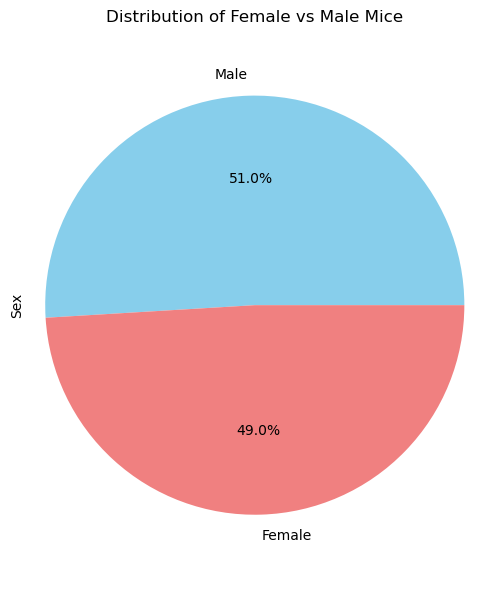

In [330]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = clean_data['Sex'].value_counts()
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], figsize=(5, 6))


plt.title('Distribution of Female vs Male Mice')
plt.ylabel('Sex')

# Display the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

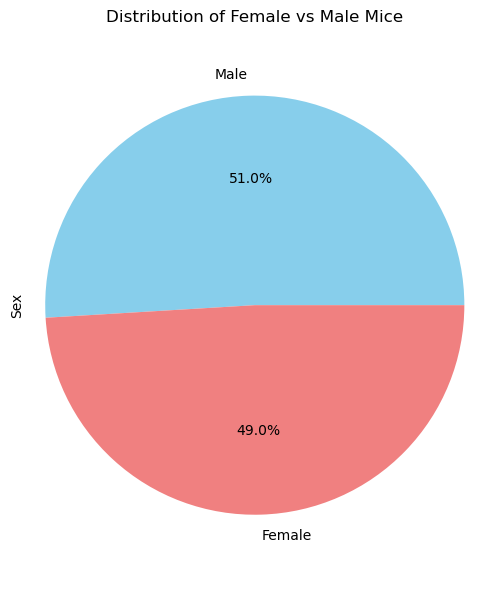

In [331]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts = clean_data['Sex'].value_counts()

plt.figure(figsize=(5, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])



plt.title('Distribution of Female vs Male Mice')
plt.ylabel('Sex')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [332]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Filter the combined_data DataFrame for the specified treatment regimens
filtered_data = combined_data[combined_data['Drug Regimen'].isin(treatment_regimens)]

# Group by 'Mouse ID' to find the last (greatest) timepoint for each mouse
last_timepoint = filtered_data.groupby('Mouse ID')['Timepoint'].max()

# Merge the last_timepoint series back into the combined_data DataFrame to get the final tumor volume
final_tumor_volume = pd.merge(last_timepoint, combined_data, on=['Mouse ID', 'Timepoint'])

final_tumor_volume.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [333]:

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor volume data
tumor_vol_data = []

# Loop through each treatment
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add subset to tumor volume data list
    tumor_vol_data.append(tumor_volumes)
    
    # Calculate quartiles, IQR, and bounds for outliers
    quartiles = tumor_volumes.quantile([0.25, 0.75])
    Q1 = quartiles[0.25]
    Q3 = quartiles[0.75]
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Determine potential outliers
    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    # Print results
    print(f"{treatment}'s potential outliers:")
    if outliers.empty:
        print("Series([], Name: Tumor Volume (mm3), dtype: float64)")
    else:
        print(outliers)
    print("\n")

Capomulin's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)


Ramicane's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)


Infubinol's potential outliers:
15    36.321346
Name: Tumor Volume (mm3), dtype: float64


Ceftamin's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)




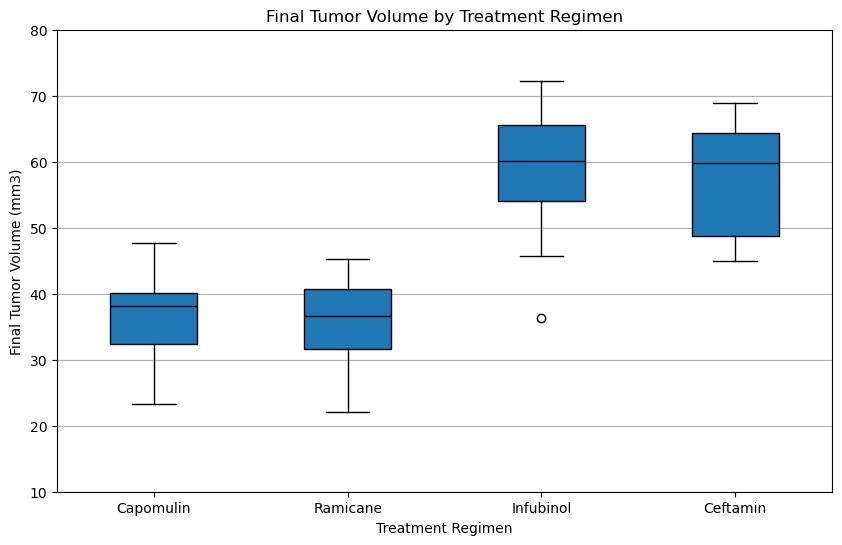

In [334]:

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor volume data
tumor_vol_data = []

# Loop through each treatment
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add subset to tumor volume data list
    tumor_vol_data.append(tumor_volumes)


plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data, labels=treatments, patch_artist=True, medianprops=dict(color='black'))


plt.title('Final Tumor Volume by Treatment Regimen')
plt.xlabel('Treatment Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.ylim(10, 80)  # Set y-axis limit for better visualization
plt.grid(axis='y')

# Show plot
plt.show()



## Line and Scatter Plots

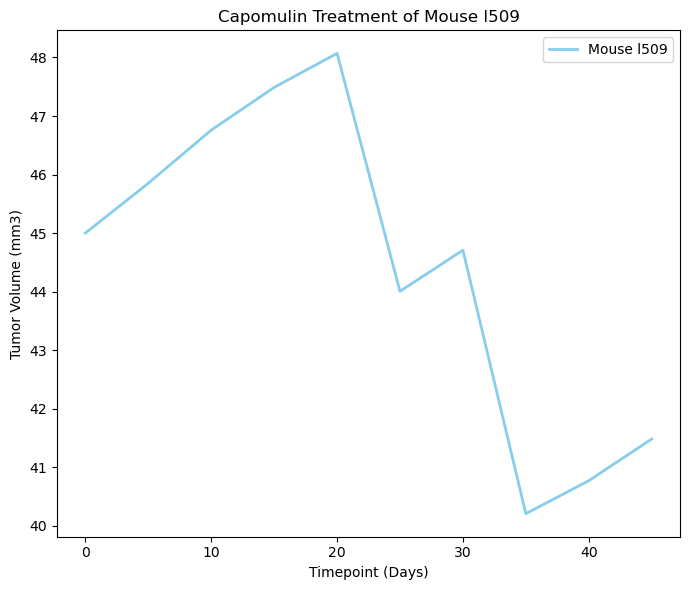

In [335]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = combined_data[combined_data['Drug Regimen'] == 'Capomulin']


mouse_l509_data = capomulin_data[capomulin_data['Mouse ID'] == 'l509']


x_axis = mouse_l509_data['Timepoint']
tumor_volume = mouse_l509_data['Tumor Volume (mm3)']


plt.figure(figsize=(7,6))
plt.plot(x_axis, tumor_volume, marker='1', color='skyblue', linewidth=2, markersize=0, label='Mouse l509')
plt.title('Capomulin Treatment of Mouse l509')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()








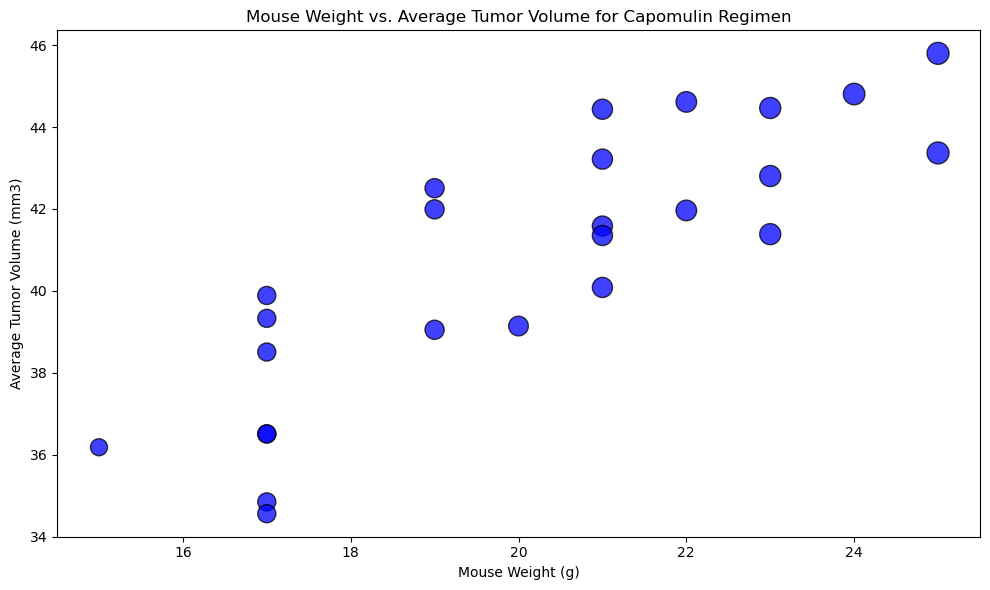

In [336]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = combined_data[combined_data['Drug Regimen'] == 'Capomulin']

# Calculate average tumor volume for each mouse treated with Capomulin
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Retrieve mouse weight (it remains constant for each mouse)
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Generate the scatter plot
plt.figure(figsize=(10,6))
plt.scatter(mouse_weight, avg_tumor_volume, marker='o', facecolors='blue', edgecolors='black', s=mouse_weight*10, alpha=0.75)
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.tight_layout()
plt.show()

## Correlation and Regression

Correlation Coefficient: 0.8419363424694721


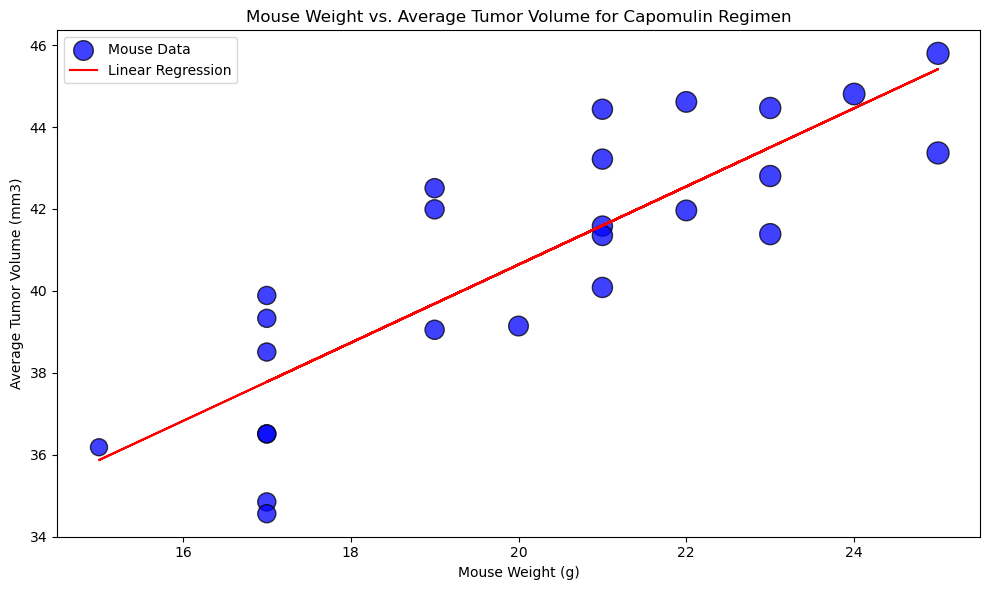

In [337]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

capomulin_data = combined_data[combined_data['Drug Regimen'] == 'Capomulin']

avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Retrieve mouse weight (it remains constant for each mouse)
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Calculate correlation coefficient using Pandas .corr() method
correlation = avg_tumor_volume.corr(mouse_weight)

# Calculate linear regression parameters manually
# Calculate mean of x and y
x_mean = mouse_weight.mean()
y_mean = avg_tumor_volume.mean()

# Calculate slope
numerator = ((mouse_weight - x_mean) * (avg_tumor_volume - y_mean)).sum()
denominator = ((mouse_weight - x_mean)**2).sum()
slope = numerator / denominator

# Calculate intercept
intercept = y_mean - slope * x_mean

# Generate the scatter plot with linear regression line
plt.figure(figsize=(10,6))
plt.scatter(mouse_weight, avg_tumor_volume, marker='o', facecolors='blue', edgecolors='black', s=mouse_weight*10, alpha=0.75, label='Mouse Data')
plt.plot(mouse_weight, slope * mouse_weight + intercept, color='red', label='Linear Regression')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


# Print correlation coefficient
print(f"Correlation Coefficient: {correlation}")

plt.legend(loc='best')
plt.tight_layout()
plt.show()